<a href="https://colab.research.google.com/github/ANINDASAU/CNN-cifar-10/blob/main/cnn_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plot
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
##Download and load data
#Tranformation Function
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [4]:
#Download and transform train and test dataset
train_dataset = torchvision.datasets.CIFAR10(root='./',train=True,download=True,transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./',train=False,download=True,transform=transform)

100%|██████████| 170M/170M [00:04<00:00, 39.9MB/s]


In [5]:
!ls

cifar-10-batches-py  cifar-10-python.tar.gz  sample_data


In [6]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [7]:
test_dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [8]:
#Create Dataloader for train and test dataset
train_dataloader = torch.utils.data.DataLoader(train_dataset,batch_size=4,shuffle=True,num_workers=2)
test_dataloader = torch.utils.data.DataLoader(test_dataset,batch_size=4,shuffle=False,num_workers=2)

In [9]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
#view some training images
def imshow(img):
    img = img/2 + 0.5
    np_img =img.numpy()
    plot.imshow(np.transpose(np_img,(1,2,0)))

torch.Size([4, 3, 32, 32])
torch.Size([4])


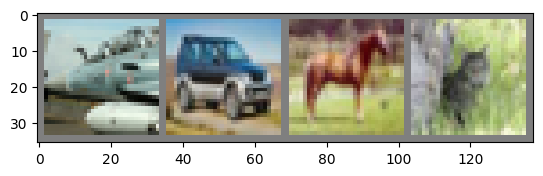

In [11]:
# show the image
train_iter = iter(train_dataloader)
images, labels = next(train_iter)  # use next() function
print(images.shape)
print(labels.shape)
imshow(torchvision.utils.make_grid(images))

In [12]:
##DEFINE NEURAL NETWORK
class ImageClassifierNeuralNetwork(nn.Module):
  def __init__(self):
    super(ImageClassifierNeuralNetwork, self).__init__()
    self.conv_1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv_2 = nn.Conv2d(6,16,5)
    self.fc_1 = nn.Linear(16*5*5,120)
    self.fc_2 = nn.Linear(120,80)
    self.fc_3 = nn.Linear(80,10)

  def forward(self,x):
    x = self.pool(F.relu(self.conv_1(x)))
    x = self.pool(F.relu(self.conv_2(x)))
    x =x.view(-1, 16*5*5)
    x = F.relu(self.fc_1(x))
    x = F.relu(self.fc_2(x))
    x = self.fc_3(x)
    return x


In [16]:
ICNet = ImageClassifierNeuralNetwork()

In [17]:
##DEFINE LOSS FUNCTION
criterion = nn.CrossEntropyLoss()
##Create an Optimizer
optimizer = optim.SGD(ICNet.parameters(),lr=0.001,momentum=0.9)

In [19]:
##TRAIN THE NEURAL NETWORK ON THE TRAINING IMAGES
for epoch in range(4):
  running_loss = 0.0

  for i, train_data in enumerate(train_dataloader,0):
    #get the input image
    inputs, labels = train_data
    #set the optimizer gradient to zero
    optimizer.zero_grad()

    outputs = ICNet(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i % 500 == 499:
      print(epoch + 1, i+1, running_loss/500)
      running_loss = 0.0

print('Training is Finished')

1 500 1.2908792642951012
1 1000 1.289671213299036
1 1500 1.3170989697277546
1 2000 1.318018128633499
1 2500 1.2886037374436856
1 3000 1.3268882399201394
1 3500 1.3121625988185406
1 4000 1.2890939778983592
1 4500 1.2858432045280934
1 5000 1.3075065556168557
1 5500 1.294483753979206
1 6000 1.2599884050786496
1 6500 1.246419492214918
1 7000 1.3009786077737808
1 7500 1.244100422874093
1 8000 1.2580726858973503
1 8500 1.2485743701756
1 9000 1.2555691506266593
1 9500 1.25195781904459
1 10000 1.2608882433474065
1 10500 1.2477638816833496
1 11000 1.2214638872146606
1 11500 1.2125288788080215
1 12000 1.219769735351205
1 12500 1.235040059477091
2 500 1.172287428662181
2 1000 1.1932338234782218
2 1500 1.1303372411131858
2 2000 1.1544332750737667
2 2500 1.2090975765287877
2 3000 1.1519069732576608
2 3500 1.1417114474475383
2 4000 1.1441315642744303
2 4500 1.1677707970738411
2 5000 1.1427033969461917
2 5500 1.1702660956978799
2 6000 1.2056238340735435
2 6500 1.1805024268329143
2 7000 1.191142709881

In [20]:
##TEST THE NEURAL NETWORK ON THE TEST IMAGES
train_iter = iter(train_dataloader)

In [22]:
images, labels = next(train_iter)

In [23]:
labels.shape

torch.Size([4])

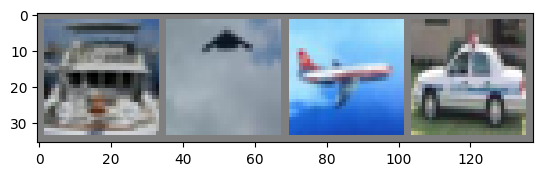

In [24]:
imshow(torchvision.utils.make_grid(images))

In [25]:
print(' '.join(classes[labels[i]] for i in range(4)))

ship airplane airplane automobile


In [26]:
outputs = ICNet(images)

In [28]:
outputs.shape

torch.Size([4, 10])

In [29]:
_, predicted_output = torch.max(outputs, 1)

In [30]:
print(' '.join(classes[predicted_output[i]] for i in range(4)))

ship bird airplane automobile


In [31]:
correct = 0
total = 0

with torch.no_grad():
  for test_data in test_dataloader:
    test_images, test_labels = test_data
    test_predictions = ICNet(test_images)
    _ , predicted_output = torch.max(test_predictions.data,1)
    total += test_labels.size(0)
    correct += (predicted_output == test_labels).sum().item()

accuracy =100 * correct/total
print(accuracy)

62.56
